<a href="https://colab.research.google.com/github/imanmohamad10/Data-Analyst-on-Sales-Performance-and-Customer-Insight-in-Retails-E-Commerce-/blob/main/latest_v1_Excelerate%2BZRDA%2BEX_ZRDA_25_002%2Btype_asset%2Bblock_Python_Capstone_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Sample: Exploratory Data Analysis of Retail Sales and Customer Demographics

## 1️⃣ Project Title and Introduction:

**Title:** Sales Performance and Customer Insights in Retail Transactions

This project analyzes sales transaction data from a retail business to uncover product performance, regional demand patterns, and revenue distribution. The analysis explores how categories, sub-categories, and geographic locations contribute to overall sales and profitability. The goal is to provide data-driven insights to optimize inventory management, improve marketing strategies, and enhance business decision-making.

## 2️⃣ Scoping Your Data Analysis Project

Big questions:
- Which product categories and sub-categories generate the highest sales?
- How does sales distribution vary across different states ?
- What are the key sales trends over month ?
- Which areas of the business contribute most to profitability?

Datasets Used:
- List of Orders.csv – Order-level data (Order ID, Order Date, Customer Name, State, City).
- Order Details.csv – Transaction details (Order ID, Amount, Profit, Quantity, Category, Sub Category).

Relationships between Data Columns:
- Category/Sub-Category vs. Sales & Quantity: Identifies top-selling products and performance distribution.

- State vs. Total Sales: Highlights geographic sales concentration and potential
regional opportunities.
- Order Date (Month-Year) vs. Sales Trend: Shows seasonality and time-based sales patterns.
- Profit Margin vs. Categories: Determines product-level or category-level profitability.


## 3️⃣Data Preparation

### Data Cleaning & Data Transformation:

- Handle missing values in both datasets (e.g., missing prices, order dates, or last visit dates).




In [ ]:
import pandas as pd
import numpy as np

# Load datasets
orders = pd.read_csv('List of Orders.csv')
details = pd.read_csv('Order Details.csv')

In [ ]:
orders.head()

,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,03-04-2018,Divsha,Rajasthan,Jaipur
4,B-25605,05-04-2018,Kasheen,West Bengal,Kolkata


In [ ]:
details.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones


## identify missing values

In [ ]:
print("Missing values in orders dataset:")
print(orders.isnull().sum())
print("\nMissing values in details dataset:")
print(details.isnull().sum())

Missing values in orders dataset:
Order ID        60
Order Date      60
CustomerName    60
State           60
City            60
dtype: int64

Missing values in details dataset:
Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
dtype: int64


##  Handling missing values

In [ ]:
orders_cleaned = orders.dropna(subset=['Order ID', 'Order Date', 'CustomerName', 'State', 'City'])


In [ ]:
print("Missing values in orders dataset:")
print(orders_cleaned.isnull().sum())

Missing values in orders dataset:
Order ID        0
Order Date      0
CustomerName    0
State           0
City            0
dtype: int64


##  Identify duplicates in both dataset

In [ ]:
duplicates = orders_cleaned.duplicated()
orders_cleaned[duplicates]

,Order ID,Order Date,CustomerName,State,City


In [ ]:
duplicates = details.duplicated()
details[duplicates]

,Order ID,Amount,Profit,Quantity,Category,Sub-Category


### Data Manipulation and Data Transformation:
- Ensure data types and formatting are consistent.




In [ ]:
orders_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      500 non-null    object
 1   Order Date    500 non-null    object
 2   CustomerName  500 non-null    object
 3   State         500 non-null    object
 4   City          500 non-null    object
dtypes: object(5)
memory usage: 23.4+ KB


In [ ]:
details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      1500 non-null   object 
 1   Amount        1500 non-null   float64
 2   Profit        1500 non-null   float64
 3   Quantity      1500 non-null   int64  
 4   Category      1500 non-null   object 
 5   Sub-Category  1500 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 70.4+ KB


In [ ]:
#convert date variable to datetime datatype
orders_cleaned['Order Date'] = pd.to_datetime(orders_cleaned['Order Date'], format='%d-%m-%Y', errors='coerce')


/tmp/ipython-input-595978241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_cleaned['Order Date'] = pd.to_datetime(orders_cleaned['Order Date'], format='%d-%m-%Y', errors='coerce')


In [ ]:
orders_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      500 non-null    object        
 1   Order Date    500 non-null    datetime64[ns]
 2   CustomerName  500 non-null    object        
 3   State         500 non-null    object        
 4   City          500 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 23.4+ KB


### Data Merging:

- Join the "details" dataset with the "order_cleaned" dataset using Order ID as the key.


In [ ]:
df_merged = pd.merge(details, orders_cleaned, on='Order ID', how='left')
df_merged.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,Order Date,CustomerName,State,City
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases,2018-04-01,Bharat,Gujarat,Ahmedabad
1,B-25601,66.0,-12.0,5,Clothing,Stole,2018-04-01,Bharat,Gujarat,Ahmedabad
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief,2018-04-01,Bharat,Gujarat,Ahmedabad
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games,2018-04-01,Bharat,Gujarat,Ahmedabad
4,B-25602,168.0,-111.0,2,Electronics,Phones,2018-04-01,Pearl,Maharashtra,Pune


- Checking the missing values after merging


In [ ]:
print("Missing values in orders dataset:")
print(df_merged.isnull().sum())

Missing values in orders dataset:
Order ID         0
Amount           0
Profit           0
Quantity         0
Category         0
Sub-Category     0
Order Date       0
CustomerName     0
State            0
City             0
Month-Year       0
Total_Sales      0
Profit_Margin    0
dtype: int64


In [ ]:
# Create Month-Year column for trend analysis
df_merged['Month-Year'] = df_merged['Order Date'].dt.to_period('M')

# Total sales per line item
df_merged['Total_Sales'] = df_merged['Amount'] * df_merged['Quantity']

# Profit margin per line item
df_merged['Profit_Margin'] = np.where(df_merged['Amount'] != 0, df_merged['Profit']/df_merged['Amount'], 0)


In [ ]:
df_merged.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,Order Date,CustomerName,State,City,Month-Year,Total_Sales,Profit_Margin
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases,2018-04-01,Bharat,Gujarat,Ahmedabad,2018-04,8925.0,-0.900392
1,B-25601,66.0,-12.0,5,Clothing,Stole,2018-04-01,Bharat,Gujarat,Ahmedabad,2018-04,330.0,-0.181818
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief,2018-04-01,Bharat,Gujarat,Ahmedabad,2018-04,24.0,-0.250000
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games,2018-04-01,Bharat,Gujarat,Ahmedabad,2018-04,320.0,-0.700000
4,B-25602,168.0,-111.0,2,Electronics,Phones,2018-04-01,Pearl,Maharashtra,Pune,2018-04,336.0,-0.660714


## 4️⃣ Exploratory Data Analysis

1.   List item
2.   List item



### Descriptive Analysis:

- descriptive analysis to summarise the
dataset

In [ ]:
df_merged.describe()

,Amount,Profit,Quantity,Order Date,Total_Sales,Profit_Margin
count,1500.000000,1500.000000,1500.000000,1500,1500.000000,1500.000000
mean,287.668000,15.970000,3.743333,2018-10-23 14:00:57.600000,1431.246667,0.013871
min,4.000000,-1981.000000,1.000000,2018-04-01 00:00:00,4.000000,-2.425532
25%,45.000000,-9.250000,2.000000,2018-07-26 18:00:00,120.000000,-0.130469
50%,118.000000,9.000000,3.000000,2018-11-08 00:00:00,415.500000,0.110479
75%,322.000000,38.000000,5.000000,2019-01-27 00:00:00,1286.250000,0.294118
max,5729.000000,1698.000000,14.000000,2019-03-31 00:00:00,80206.000000,0.508475
std,461.050488,169.140565,2.184942,NaN,3694.882925,0.386031


### Extract column

- Extract column Month in year
- Extract column total sales
- Extract column Profit Margin

In [ ]:
# Create Month-Year column for trend analysis
df_merged['Month-Year'] = df_merged['Order Date'].dt.to_period('M')

# Total sales per line item
df_merged['Total_Sales'] = df_merged['Amount'] * df_merged['Quantity']

# Profit margin per line item
df_merged['Profit_Margin'] = np.where(df_merged['Amount'] != 0, df_merged['Profit']/df_merged['Amount'], 0)

In [ ]:
df_merged.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,Order Date,CustomerName,State,City,Month-Year,Total_Sales,Profit_Margin
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases,2018-04-01,Bharat,Gujarat,Ahmedabad,2018-04,8925.0,-0.900392
1,B-25601,66.0,-12.0,5,Clothing,Stole,2018-04-01,Bharat,Gujarat,Ahmedabad,2018-04,330.0,-0.181818
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief,2018-04-01,Bharat,Gujarat,Ahmedabad,2018-04,24.0,-0.250000
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games,2018-04-01,Bharat,Gujarat,Ahmedabad,2018-04,320.0,-0.700000
4,B-25602,168.0,-111.0,2,Electronics,Phones,2018-04-01,Pearl,Maharashtra,Pune,2018-04,336.0,-0.660714


### Filtered column for better analysis

- Total sales and profit by Category
- Top Sub-Categories by sales

In [ ]:
# a) Total sales and profit by Category
category_summary = df_merged.groupby('Category')[['Amount','Profit','Quantity']].sum().sort_values(by='Amount', ascending=False)
print("Sales and Profit by Category:")
print(category_summary)

Sales and Profit by Category:
               Amount   Profit  Quantity
Category                                
Electronics  165267.0  10494.0      1154
Clothing     139054.0  11163.0      3516
Furniture    127181.0   2298.0       945


In [ ]:
# b) Top Sub-Categories by sales
top_subcategories = df_merged.groupby('Sub-Category')[['Amount','Quantity']].sum().sort_values(by='Amount', ascending=False).head(10)
print("\nTop 10 Sub-Categories by Sales:")
print(top_subcategories)


Top 10 Sub-Categories by Sales:
                   Amount  Quantity
Sub-Category                       
Printers          58252.0       291
Bookcases         56861.0       297
Saree             53511.0       782
Phones            46119.0       304
Electronic Games  39168.0       297
Chairs            34222.0       277
Trousers          30039.0       135
Tables            22614.0        61
Accessories       21728.0       262
Stole             18546.0       671


### Data Visualisation:
- Visualise data in graphs to better understand the data.

/tmp/ipython-input-2032674626.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')


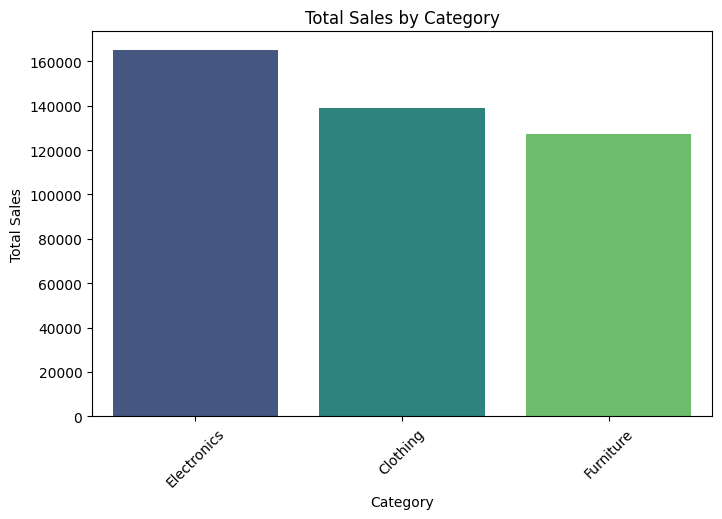

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Total sales by Category
category_sales = df_merged.groupby('Category')['Amount'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')
plt.title('Total Sales by Category')
plt.ylabel('Total Sales')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-43676146.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_subcategories.values, y=top_subcategories.index, palette='magma')


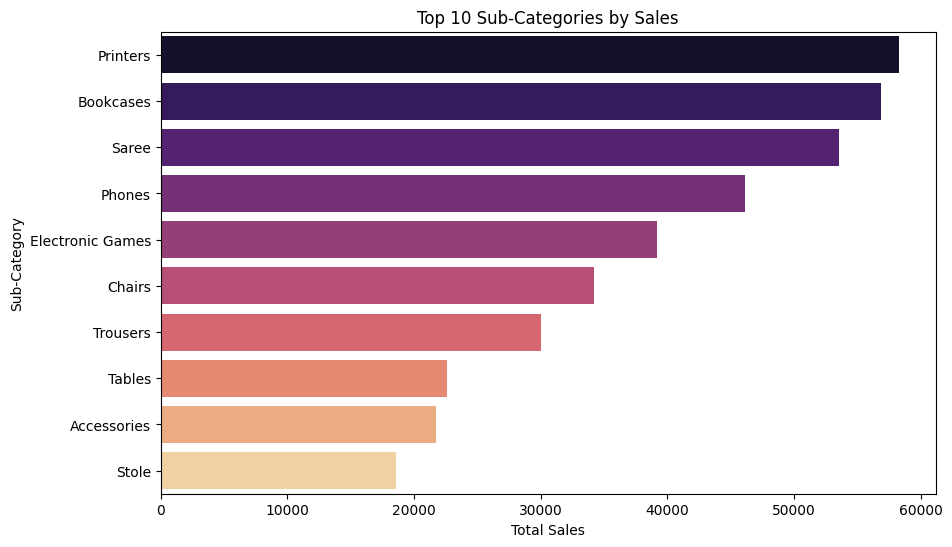

In [ ]:
top_subcategories = df_merged.groupby('Sub-Category')['Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_subcategories.values, y=top_subcategories.index, palette='magma')
plt.title('Top 10 Sub-Categories by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Sub-Category')
plt.show()

/tmp/ipython-input-874329523.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_sales.values, y=state_sales.index, palette='coolwarm')


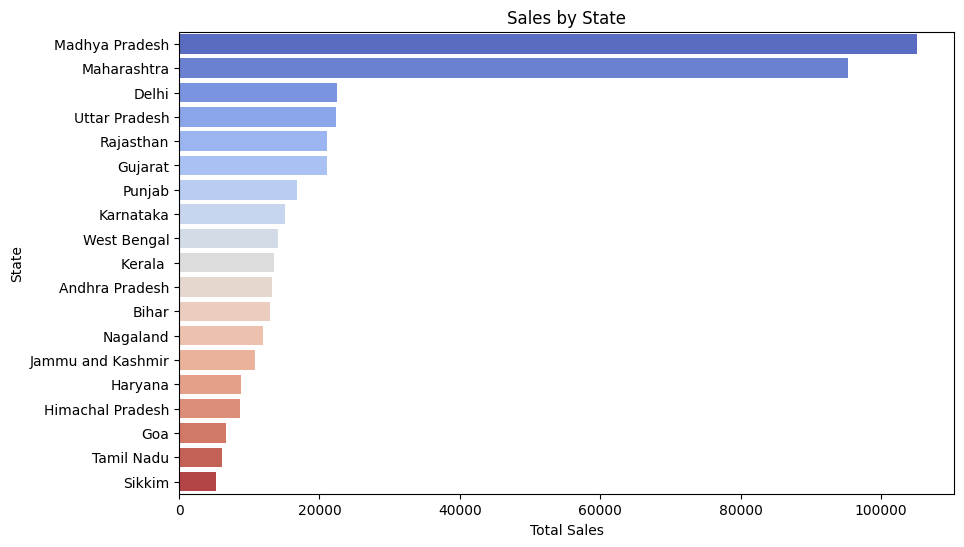

In [ ]:
state_sales = df_merged.groupby('State')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=state_sales.values, y=state_sales.index, palette='coolwarm')
plt.title('Sales by State')
plt.xlabel('Total Sales')
plt.ylabel('State')
plt.show()

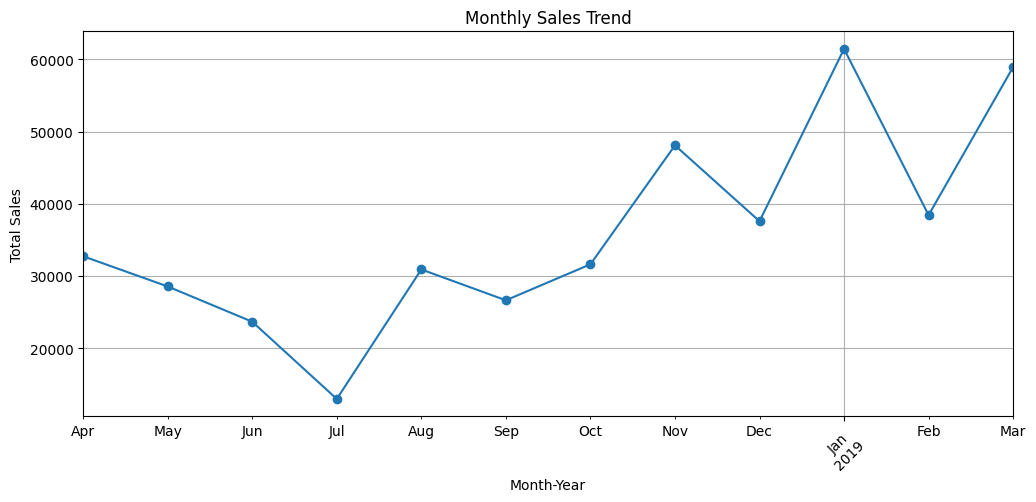

In [ ]:
monthly_sales = df_merged.groupby('Month-Year')['Amount'].sum()

plt.figure(figsize=(12,5))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Profitability by Category:
               Amount   Profit  Profit_Margin
Category                                     
Clothing     139054.0  11163.0       0.080278
Electronics  165267.0  10494.0       0.063497
Furniture    127181.0   2298.0       0.018069


/tmp/ipython-input-85348800.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_profit.index, y=category_profit['Profit_Margin'], palette="viridis")


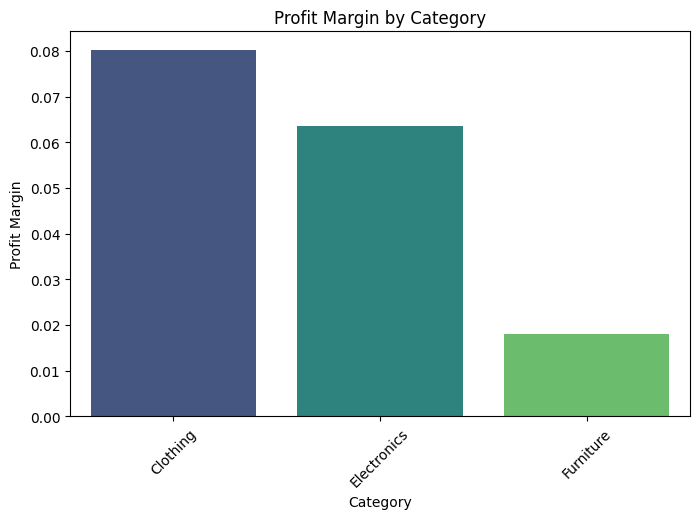

In [ ]:
# Profitability by Category
category_profit = df_merged.groupby('Category')[['Amount', 'Profit']].sum()
category_profit['Profit_Margin'] = category_profit['Profit'] / category_profit['Amount']

print("\nProfitability by Category:")
print(category_profit.sort_values(by='Profit_Margin', ascending=False))

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x=category_profit.index, y=category_profit['Profit_Margin'], palette="viridis")
plt.title('Profit Margin by Category')
plt.ylabel('Profit Margin')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()




```
# This is formatted as code
```

## 5️⃣ Data Insights

- Summarize your main takeaways. What patterns or trends did you find?

-Electronics is the Top-Selling Category, with Printers and Bookcases as the highest-revenue sub-categories, followed by clothing items like Sarees.

-Sales are Highly Concentrated in a Few States, with Slate, Madhya Pradesh, and Maharashtra as the top contributors, significantly outperforming all other regions.

-Sales Show a Strong and Consistent Growth Trend throughout the year, starting in April and rising steadily to peak in March.

-The Clothing Category is the Primary Driver of Profitability, achieving a significantly higher profit margin than the Electronics category.

-A Critical Gap Exists Between Sales and Profit: While Electronics generates the most revenue, Clothing is far more profitable, indicating the business relies on high-volume, low-margin sales in its primary category.